## Important Info about Data Set:

Scraped data of used cars listings. 100,000 listings, which have been separated into files corresponding to each car manufacturer.
The cleaned data set contains information of price, transmission, mileage, fuel type, road tax, miles per gallon (mpg), and engine size.

Kaggle Link: https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes

But we have choosen only data for Audi cars. There are around 10667 records.
The Fields/Columns of the data set are:
- model: The name of the Audi car.
- year: When it was first bought?
- price: The price of the car(In Euros).
- transmission: Manual, Automatic or Semi-Automatic.
- mileage: In terms of How many kilometres the car has travelled.
- fuelType: Petrol, Diesel or Hybrid
- tax: the tax that can be applied on buying that car.
- mpg: miles per gallon i.e. Hiw much mileage the car gives?
- engineSize: In terms of litres.

### Importing Libraries: 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
audidata = pd.read_csv("audi.csv")
audidata.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [3]:
a_clean = audidata.copy(deep = True)
# Made a deep copy.

In [4]:
audidata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [5]:
audidata.shape

(10668, 9)

In [6]:
audidata.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

As we can see that this data set is already cleaned i.e. it is having no NA Values.

We tried creating the model without removal outliers and with removal of outliers.
It has shown different accuracies for each scenario.

### Without Outlier Removal:

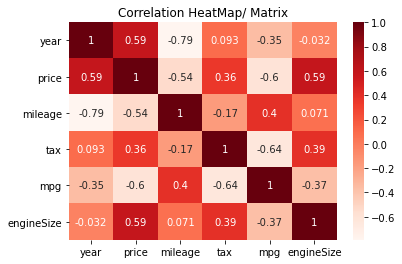

In [7]:
sns.heatmap(audidata.corr(), cmap ="Reds", annot = True)
plt.title("Correlation HeatMap/ Matrix")
plt.show()

From the Correlation Matrix we get the follwing informataion:
- There is a negative correlation price and mileage. This means the car that has driven more has more mileage and therefore the price is lesser since the car is used more.
- There is a  negative correlation with mpg(miles per gallon) and the price. This means that the higher mpg cars are cheaper. Obviously, we try to buy a car which is very efficient that is has lesser miles per gallon therefore giving more mileage.
- There is postive correlation between price of the car and the engine size of the car. It means that people tend to buy those cars having higher engine size.
- There is a small but considerable correlation between tax and the price of the car. Cars with higher taxes on them are costlier . Total Price = Selling Price + VAT(Tax appied). ^ inc.

### Exploratory Data Analysis( without outlier Removal):

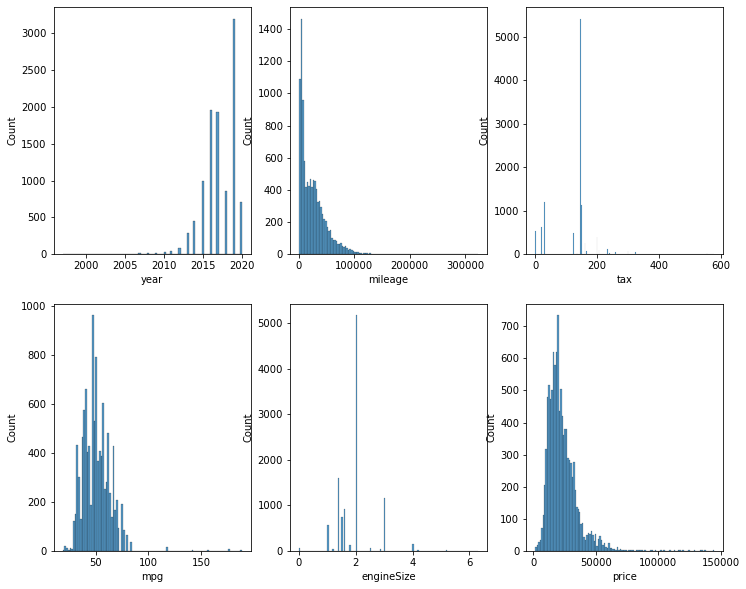

In [8]:
fig, axes = plt.subplots(figsize = (12,10), nrows = 2, ncols = 3)
sns.histplot(audidata["year"], ax = axes[0,0])
sns.histplot(audidata["mileage"], ax = axes[0,1])
sns.histplot(audidata["tax"], ax = axes[0,2])
sns.histplot(audidata["mpg"], ax = axes[1,0])
sns.histplot(audidata["engineSize"], ax = axes[1,1])
sns.histplot(audidata["price"], ax = axes[1,2])
plt.show()

- For ***year*** column, it is right-skewed which means that most of the cars are between 2015 to 2020.
- For ***mileage*** column, it is left-skewed which means that most of the cars listed are driven for more than 5000 miles.
- For ***engineSize*** column, the most used cars engine size is between 1.5 lts to 2 lts.

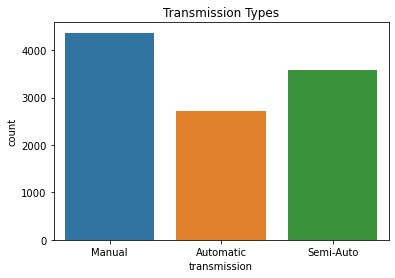

In [9]:
sns.countplot(x = "transmission", data = audidata)
plt.title("Transmission Types")
plt.show()

This countplot shows us that there are around 4000+ cars which are of Manual Transmission in UK. Around 2500+ cars which are Automatic Transmission in UK and around 3500+ Cars which are Semi-Auto transmission.

In [10]:
print(audidata['model'].unique())

[' A1' ' A6' ' A4' ' A3' ' Q3' ' Q5' ' A5' ' S4' ' Q2' ' A7' ' TT' ' Q7'
 ' RS6' ' RS3' ' A8' ' Q8' ' RS4' ' RS5' ' R8' ' SQ5' ' S8' ' SQ7' ' S3'
 ' S5' ' A2' ' RS7']


 A3     1929
 Q3     1417
 A4     1381
 A1     1347
 A5      882
 Q5      877
 Q2      822
 A6      748
 Q7      397
 TT      336
 A7      122
 A8      118
 Q8       69
 RS6      39
 RS3      33
 RS4      31
 RS5      29
 R8       28
 S3       18
 SQ5      16
 S4       12
 SQ7       8
 S8        4
 S5        3
 RS7       1
 A2        1
Name: model, dtype: int64


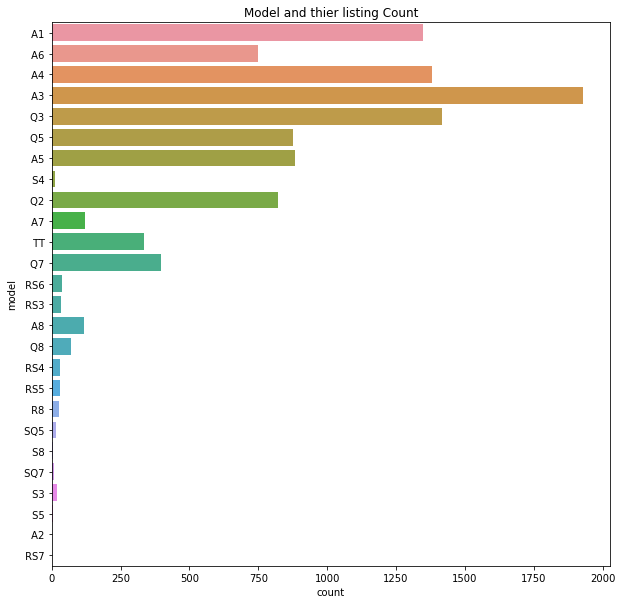

In [11]:
print(audidata["model"].value_counts())
plt.figure(figsize = (10,10))
sns.countplot(y = audidata["model"])
plt.title("Model and thier listing Count")
plt.show()

This shows that popularity of Audi A3 is more than any other model. I personally love Audi A3.

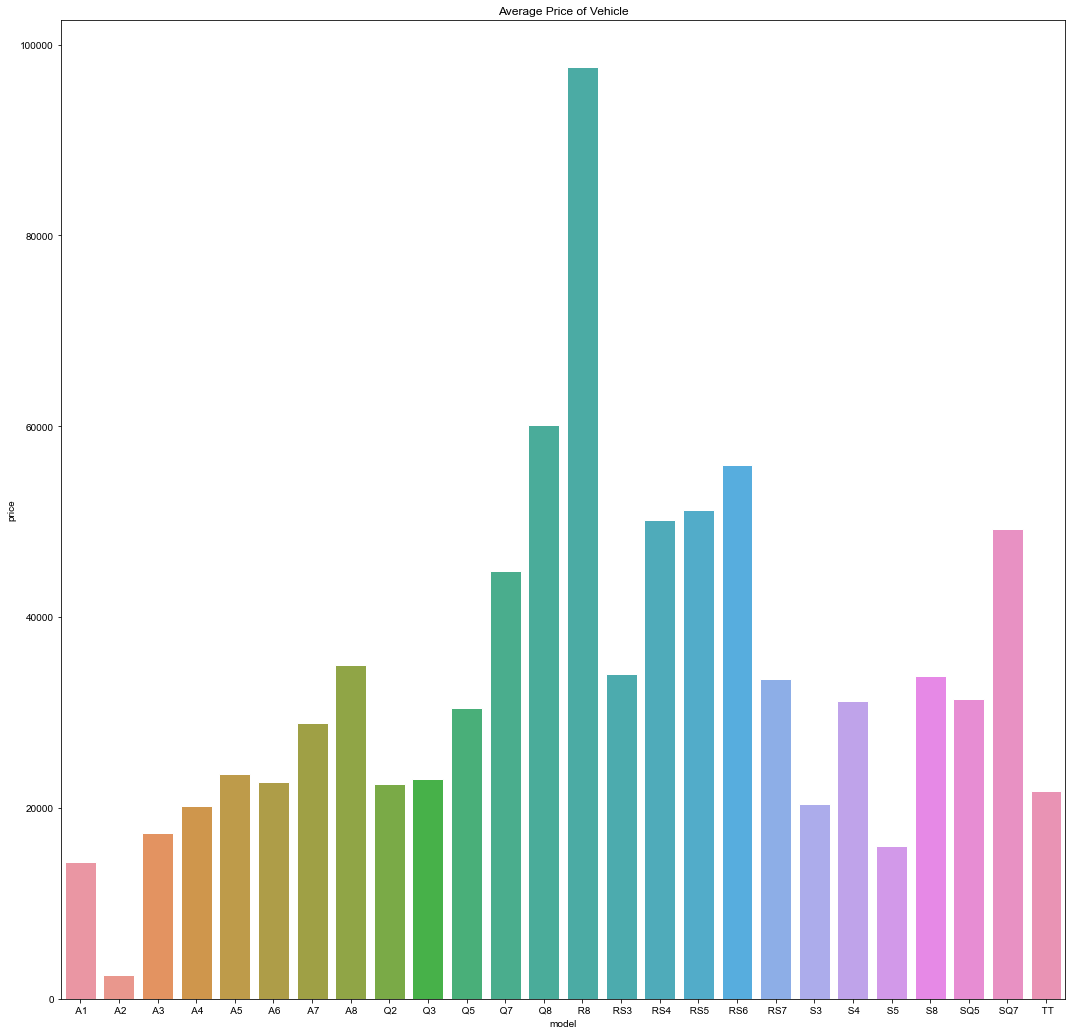

In [12]:
plt.subplots(figsize = (18,18))
priceByModel = audidata.groupby("model")['price'].mean().reset_index()
plt.title("Average Price of Vehicle")
sns.set()
sns.barplot(x = 'model', y = 'price', data = priceByModel)
plt.show()

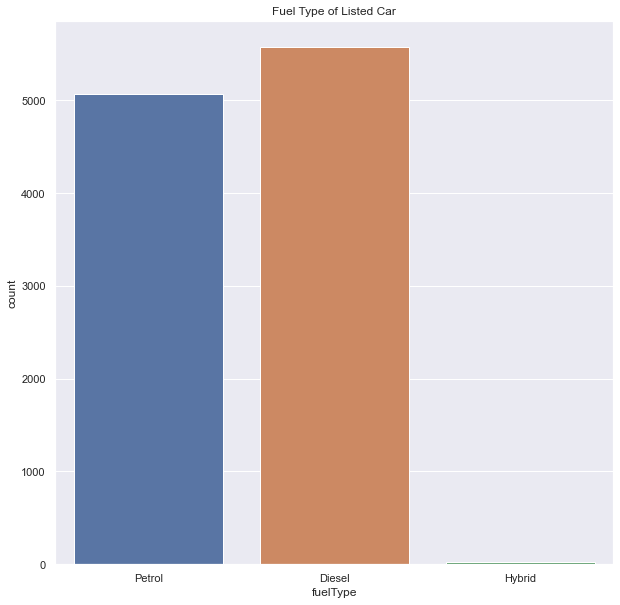

In [13]:
plt.figure(figsize = (10,10))
sns.countplot(x = "fuelType", data = audidata)
plt.title("Fuel Type of Listed Car")
plt.show()

This shows that the listed cars are of diesel fuel type. Petrol fuel type are at the second place and there are very less Hybrid Fuel Type amongst the listed cars.

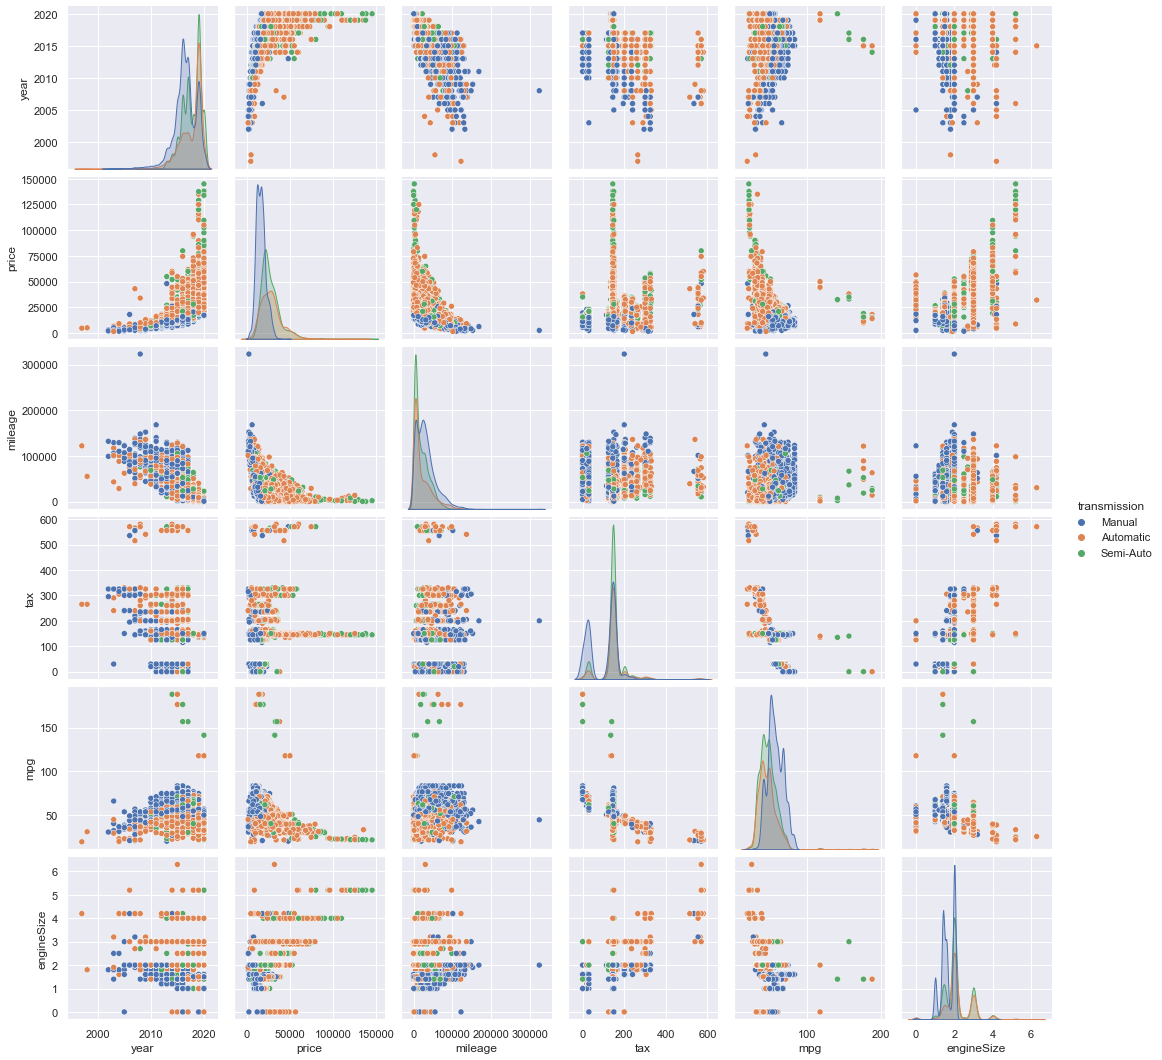

In [14]:
sns.pairplot(audidata, diag_kind = "kde", hue = "transmission")
plt.show()

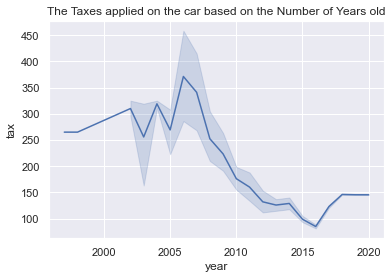

In [15]:
sns.lineplot(x = "year", y = "tax", data = audidata)
plt.title("The Taxes applied on the car based on the Number of Years old")
plt.show()

By this lineplot we can see that atleast 150 Euros are the taxes applied on cars which are relatively new i.e. 1-2 years old. In UK, every car needs to pay road tax irrespective of being an used car or a new car. There can been some deviations in the taxes on the specific year old car. Our assumption is that the taxes are varrying because the type of the car too. Like SUVs, Sedans will have more taxes applied on it. 

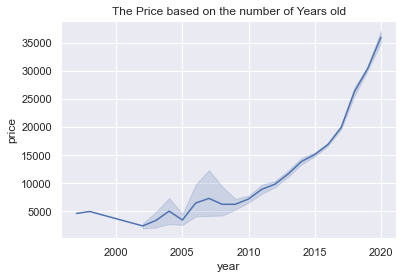

In [16]:
sns.lineplot(x = "year", y = "price", data = audidata)
plt.title("The Price based on the number of Years old")
plt.show()

By this lineplot we can see that the cars which are relatively new are having higher prices which is obvious because lesser distance the cars have travelled. But we can see that there are some deviations or differeneces in prices of the car which are like 4-5 years old. People have tried to maximize their profit but haven't seen it through.

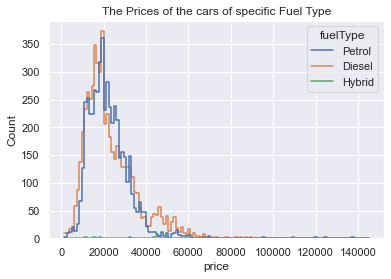

In [17]:
sns.histplot(data = audidata, x = 'price', hue = 'fuelType', fill = False, element = 'step')
plt.title("The Prices of the cars of specific Fuel Type")
plt.show()

The above visualization shows that the prices of cars of Diesel and Petrol fuel types are having almost similar price range.

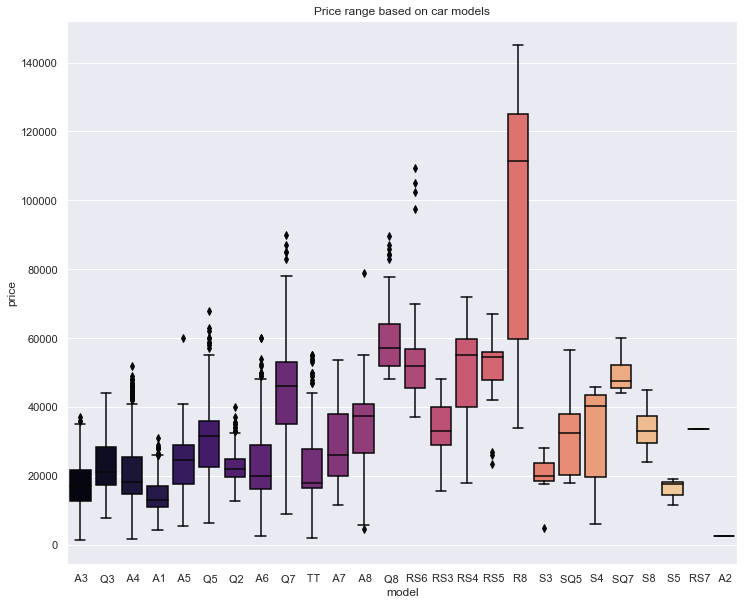

In [18]:
plt.figure(figsize = (12,10))
sns.boxplot(data = audidata, x = 'model', y = 'price', order = audidata['model'].value_counts().index, palette = 'magma')
plt.title("Price range based on car models")
plt.show()

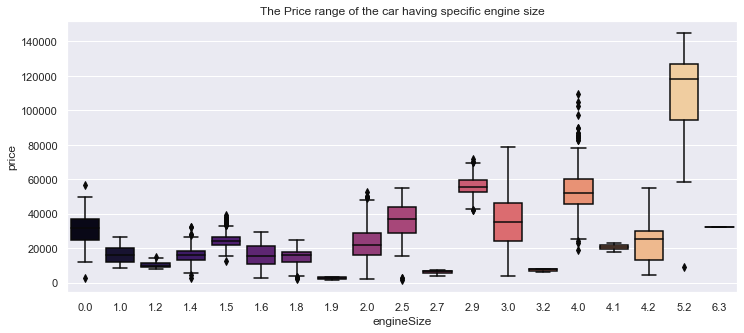

In [19]:
plt.figure(figsize = (12,5))
sns.boxplot(data = audidata, x = 'engineSize', y = 'price', palette = 'magma')
plt.title("The Price range of the car having specific engine size")
plt.show()

C:\Users\siddhesh shankar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


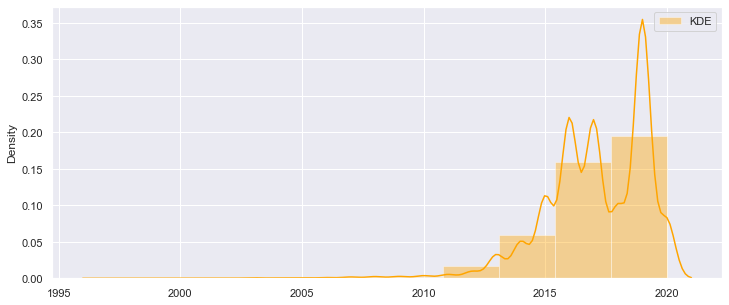

In [20]:
sns.distplot(x = audidata['year'], bins = 10, color = 'Orange',label = 'KDE')
plt.legend()
plt.gcf().set_size_inches(12,5)
plt.show()

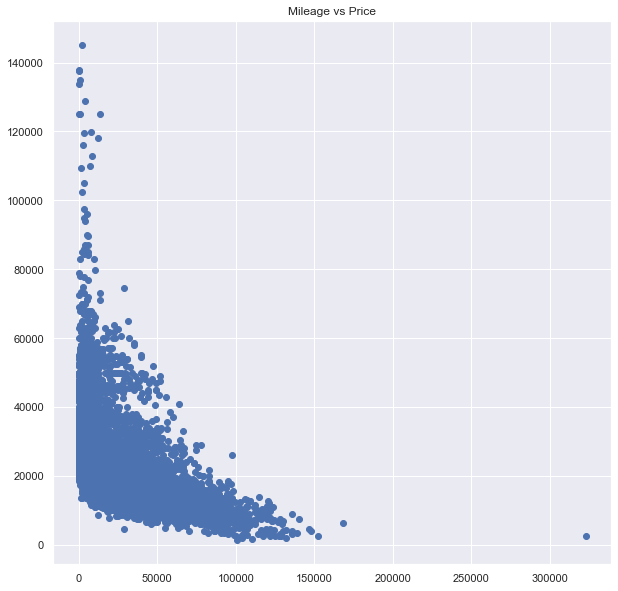

In [21]:
plt.figure(figsize = (10,10))
plt.scatter(x = audidata['mileage'], y = audidata['price'])
plt.title("Mileage vs Price")
plt.show()

### Feature Engineering(without outlier removal):

#### Label Encoding: 

We are doing Label Encoding so that we can convert the categorical values or variables into numeric values so that it is easier for the machine to read it.

In [22]:
encoder = LabelEncoder()
audidata['model'] = encoder.fit_transform(audidata['model'])
model_mapping = {index : label for index, label in enumerate(encoder.classes_)}
model_mapping

{0: ' A1',
 1: ' A2',
 2: ' A3',
 3: ' A4',
 4: ' A5',
 5: ' A6',
 6: ' A7',
 7: ' A8',
 8: ' Q2',
 9: ' Q3',
 10: ' Q5',
 11: ' Q7',
 12: ' Q8',
 13: ' R8',
 14: ' RS3',
 15: ' RS4',
 16: ' RS5',
 17: ' RS6',
 18: ' RS7',
 19: ' S3',
 20: ' S4',
 21: ' S5',
 22: ' S8',
 23: ' SQ5',
 24: ' SQ7',
 25: ' TT'}

In [23]:
audidata['transmission'] = encoder.fit_transform(audidata['transmission'])
transmission_mapping = {index : label for index, label in enumerate(encoder.classes_)}
transmission_mapping

{0: 'Automatic', 1: 'Manual', 2: 'Semi-Auto'}

In [24]:
audidata['fuelType'] = encoder.fit_transform(audidata['fuelType'])
fuelType_mapping = {index : label for index, label in enumerate(encoder.classes_)}
fuelType_mapping

{0: 'Diesel', 1: 'Hybrid', 2: 'Petrol'}

In [25]:
audidata.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,2017,12500,1,15735,2,150,55.4,1.4
1,5,2016,16500,0,36203,0,20,64.2,2.0
2,0,2016,11000,1,29946,2,30,55.4,1.4
3,3,2017,16800,0,25952,0,145,67.3,2.0
4,2,2019,17300,1,1998,2,145,49.6,1.0


In [26]:
x = audidata.drop('price', axis = 1)
y = audidata['price']

In [27]:
scaler = MinMaxScaler(copy = True, feature_range = (0,1))
X = scaler.fit_transform(x)
X[:10]

array([[0.        , 0.86956522, 0.5       , 0.04871223, 1.        ,
        0.25862069, 0.21546635, 0.22222222],
       [0.2       , 0.82608696, 0.        , 0.11208084, 0.        ,
        0.03448276, 0.2674144 , 0.31746032],
       [0.        , 0.82608696, 0.5       , 0.09270927, 1.        ,
        0.05172414, 0.21546635, 0.22222222],
       [0.12      , 0.86956522, 0.        , 0.0803439 , 0.        ,
        0.25      , 0.28571429, 0.31746032],
       [0.08      , 0.95652174, 0.5       , 0.00618268, 1.        ,
        0.25      , 0.18122786, 0.15873016],
       [0.        , 0.82608696, 0.        , 0.09987337, 1.        ,
        0.05172414, 0.23612751, 0.22222222],
       [0.2       , 0.82608696, 0.        , 0.23773139, 0.        ,
        0.05172414, 0.25088548, 0.31746032],
       [0.12      , 0.82608696, 0.5       , 0.23276852, 0.        ,
        0.03448276, 0.30519481, 0.31746032],
       [0.08      , 0.7826087 , 0.5       , 0.14275896, 1.        ,
        0.03448276, 0.243211

In [28]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 30, random_state=0)

In [29]:
print("Shape of the x_train: ", x_train.shape)

Shape of the x_train:  (10638, 8)


In [30]:
print("Shape of the x_test: ", x_test.shape)

Shape of the x_test:  (30, 8)


In [31]:
print("Shape of y_train:", y_train.shape)

Shape of y_train: (10638,)


In [32]:
print("Shape of the y_test: ", y_test.shape)

Shape of the y_test:  (30,)


### Model Creation( Without outlier removal): 
#### Linear Regression Model:

In [33]:
LinearRegressionModel = LinearRegression(fit_intercept = True, normalize = True, copy_X = True, n_jobs = -1)
LinearRegressionModel.fit(x_train, y_train)


print('Linear Regression Train Score is : ' , LinearRegressionModel.score(x_train, y_train))
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(x_test, y_test))

print('----------------------------------------------------')
y_pred = LinearRegressionModel.predict(x_test)
print('Predicted Value for Linear Regression is : ' , y_pred[:10])

Linear Regression Train Score is :  0.7872370974393196
Linear Regression Test Score is :  0.5968641922659761
----------------------------------------------------
Predicted Value for Linear Regression is :  [14026.20107128 30676.98165748 31423.28803738 26396.17145025
 31184.51892066 31433.41617958 21143.33310014 12251.21270953
 19924.9489521  33370.53718373]


In [34]:
pricePredicted = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
pricePredicted = pricePredicted.reset_index()
pricePredicted.head(5)

,index,Actual Price,Predicted Price
0,2049,14998,14026.201071
1,5609,21950,30676.981657
2,7638,28990,31423.288037
3,1603,25489,26396.171450
4,5953,30950,31184.518921


#### Random Forest Regressor Model:

In [35]:
RandomForestRegressorModel = RandomForestRegressor(n_estimators=100,max_depth=11, random_state=33)
RandomForestRegressorModel.fit(x_train, y_train)

print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(x_train, y_train))
print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(x_test, y_test))
print('Random Forest Regressor No. of features are : ' , RandomForestRegressorModel.n_features_)
print('----------------------------------------------------')

y_pred = RandomForestRegressorModel.predict(x_test)
print('Predicted Value for Random Forest Regressor is : ' , y_pred[:10])


Random Forest Regressor Train Score is :  0.975690968356232
Random Forest Regressor Test Score is :  0.9708190721522107
Random Forest Regressor No. of features are :  8
----------------------------------------------------
Predicted Value for Random Forest Regressor is :  [15444.840533   23439.64042434 27967.35277748 27409.64024733
 32041.14818844 28397.95626306 16717.8616274  34000.01842346
 20141.700503   29835.80731183]


In [36]:
pricePredicted = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
pricePredicted = pricePredicted.reset_index()
pricePredicted.head(5)

,index,Actual Price,Predicted Price
0,2049,14998,15444.840533
1,5609,21950,23439.640424
2,7638,28990,27967.352777
3,1603,25489,27409.640247
4,5953,30950,32041.148188


In [37]:
meanSquaredErrorVal = mean_squared_error(y_test, y_pred, multioutput = 'uniform_average')
print('Mean Squared Value Error: ', meanSquaredErrorVal)

Mean Squared Value Error:  2312010.641564057


In [38]:
r2 = r2_score(y_pred, y_test)
print(f'Random Forest Regressor r2-score: {r2:0.5f}')

Random Forest Regressor r2-score: 0.96649


#### CatBoost Regressor Model by Yandex:

In [39]:
catModel = CatBoostRegressor(verbose = 0, random_state = 33)
catModel.fit(x_train, y_train)
y_pred = catModel.predict(x_test)
r2 = r2_score(y_pred, y_test)
print(f'CatBoost Regressor Model by Yandex r2 score : {r2:0.5f}')

CatBoost Regressor Model by Yandex r2 score : 0.98080


In [40]:
pricePredicted = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
pricePredicted = pricePredicted.reset_index()
pricePredicted.head(5)

,index,Actual Price,Predicted Price
0,2049,14998,13363.592128
1,5609,21950,24431.695509
2,7638,28990,28112.227907
3,1603,25489,26811.297995
4,5953,30950,31569.760192


### With Outlier Removal:

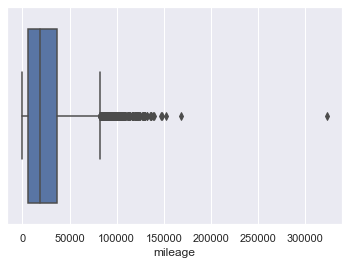

In [41]:
box1 = sns.boxplot(x = 'mileage', data = a_clean)

In [42]:
a_clean = a_clean[a_clean['mileage'] < 200000]

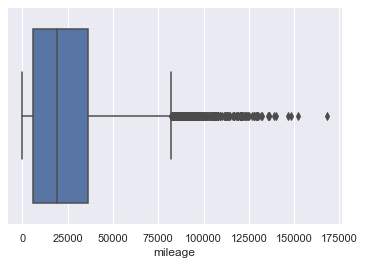

In [43]:
box1 = sns.boxplot(x = 'mileage', data = a_clean)

In [44]:
print('We removed {} outliers!'.format(len(audidata) - len(a_clean)))

We removed 1 outliers!


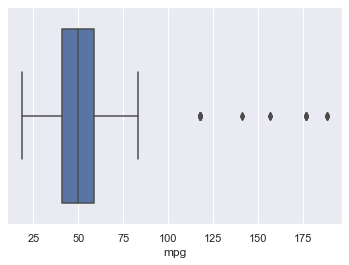

In [45]:
box1 = sns.boxplot(x ='mpg', data = audidata)

In [46]:
a_clean = a_clean[a_clean['mpg'] < 100]

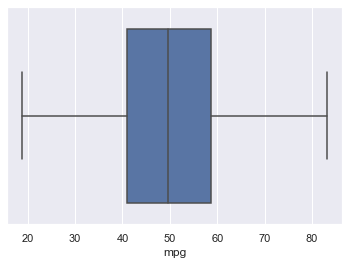

In [47]:
box1 = sns.boxplot(x ='mpg', data = a_clean)

In [48]:
print('We removed {} outliers!'.format(len(audidata) - len(a_clean)))

We removed 34 outliers!


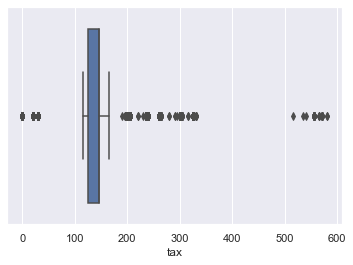

In [49]:
box1 = sns.boxplot(x ='tax', data = a_clean)

Looks like there are some outliers above 500 and below 100

In [50]:
a_clean = a_clean[a_clean['tax'] < 500]

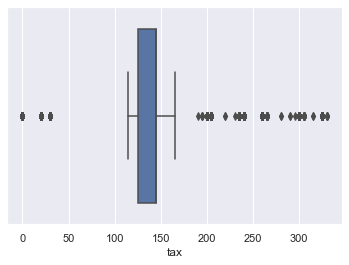

In [51]:
box1 = sns.boxplot(x = 'tax', data = a_clean)

In [52]:
print('We removed {} outliers!'.format(len(audidata) - len(a_clean)))

We removed 74 outliers!


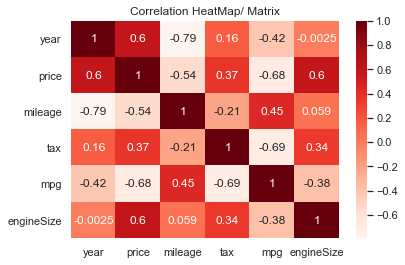

In [53]:
sns.heatmap(a_clean.corr(), cmap ="Reds", annot = True)
plt.title("Correlation HeatMap/ Matrix")
plt.show()

From the Correlation Matrix we get the following information:
- There is a negative correlation price and mileage. This means the car that has driven more has more mileage and therefore the price is lesser since the car is used more.
- There is a  negative correlation with mpg(miles per gallon) and the price. This means that the higher mpg cars are cheaper. Obviously, we try to buy a car which is very efficient that is has lesser miles per gallon therefore giving more mileage.
- There is positive correlation between price of the car and the engine size of the car. It means that people tend to buy those cars having higher engine size.
- There is a small but considerable correlation between tax and the price of the car. Cars with higher taxes on them are costlier. Total Price = Selling Price + VAT(Tax applied). ^ inc.

### Exploratory Data Analysis:

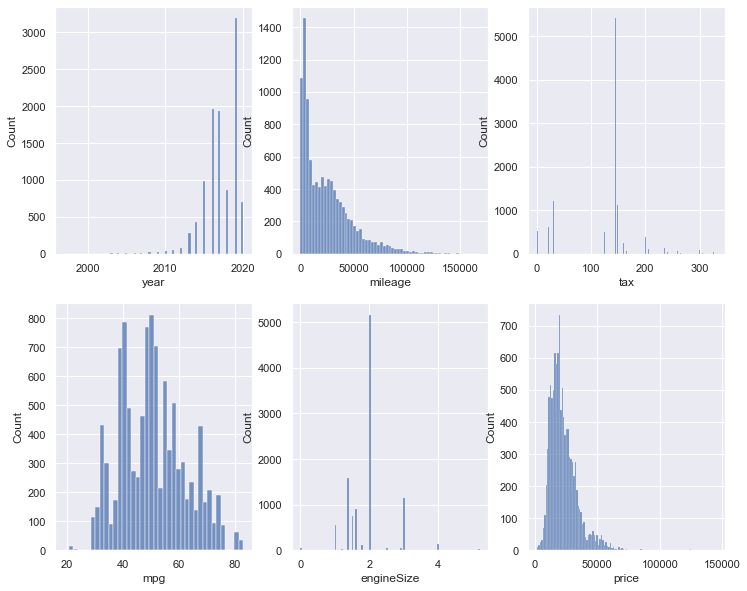

In [54]:
fig, axes = plt.subplots(figsize = (12,10), nrows = 2, ncols = 3)
sns.histplot(a_clean["year"], ax = axes[0,0])
sns.histplot(a_clean["mileage"], ax = axes[0,1])
sns.histplot(a_clean["tax"], ax = axes[0,2])
sns.histplot(a_clean["mpg"], ax = axes[1,0])
sns.histplot(a_clean["engineSize"], ax = axes[1,1])
sns.histplot(a_clean["price"], ax = axes[1,2])
plt.show()

- For ***year*** column, it is right-skewed which means that most of the cars are between 2015 to 2020.
- For ***mileage*** column, it is left-skewed which means that most of the cars listed are driven for more than 5000 miles.
- For ***engineSize*** column, the most used cars engine size is between 1.5 lts to 2 lts.

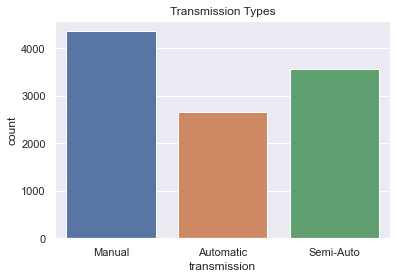

In [55]:
sns.countplot(x = "transmission", data = a_clean)
plt.title("Transmission Types")
plt.show()

This countplot shows us that there are around 4000+ cars which are of Manual Transmission in UK. Around 2500+ cars which are Automatic Transmission in UK and around 3500+ Cars which are Semi-Auto transmission.

In [56]:
print(a_clean['model'].unique())

[' A1' ' A6' ' A4' ' A3' ' Q3' ' Q5' ' A5' ' S4' ' Q2' ' A7' ' TT' ' Q7'
 ' RS6' ' RS3' ' A8' ' Q8' ' RS5' ' RS4' ' R8' ' SQ5' ' S8' ' SQ7' ' S3'
 ' S5' ' A2']


 A3     1914
 Q3     1417
 A4     1380
 A1     1347
 A5      882
 Q5      862
 Q2      822
 A6      746
 Q7      390
 TT      333
 A7      122
 A8      116
 Q8       69
 RS6      34
 RS3      33
 RS5      26
 RS4      23
 R8       18
 S3       18
 SQ5      16
 S4       11
 SQ7       8
 S8        3
 S5        3
 A2        1
Name: model, dtype: int64


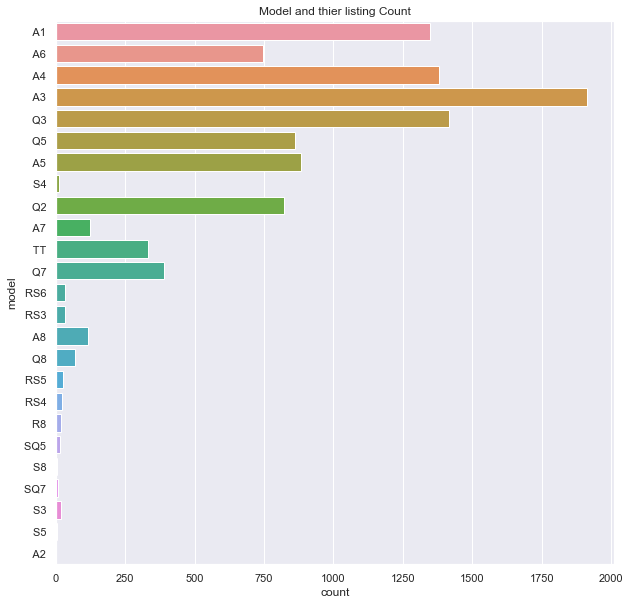

In [57]:
print(a_clean["model"].value_counts())
plt.figure(figsize = (10,10))
sns.countplot(y = a_clean["model"])
plt.title("Model and thier listing Count")
plt.show()

There are more number of Audi A3's then any model.

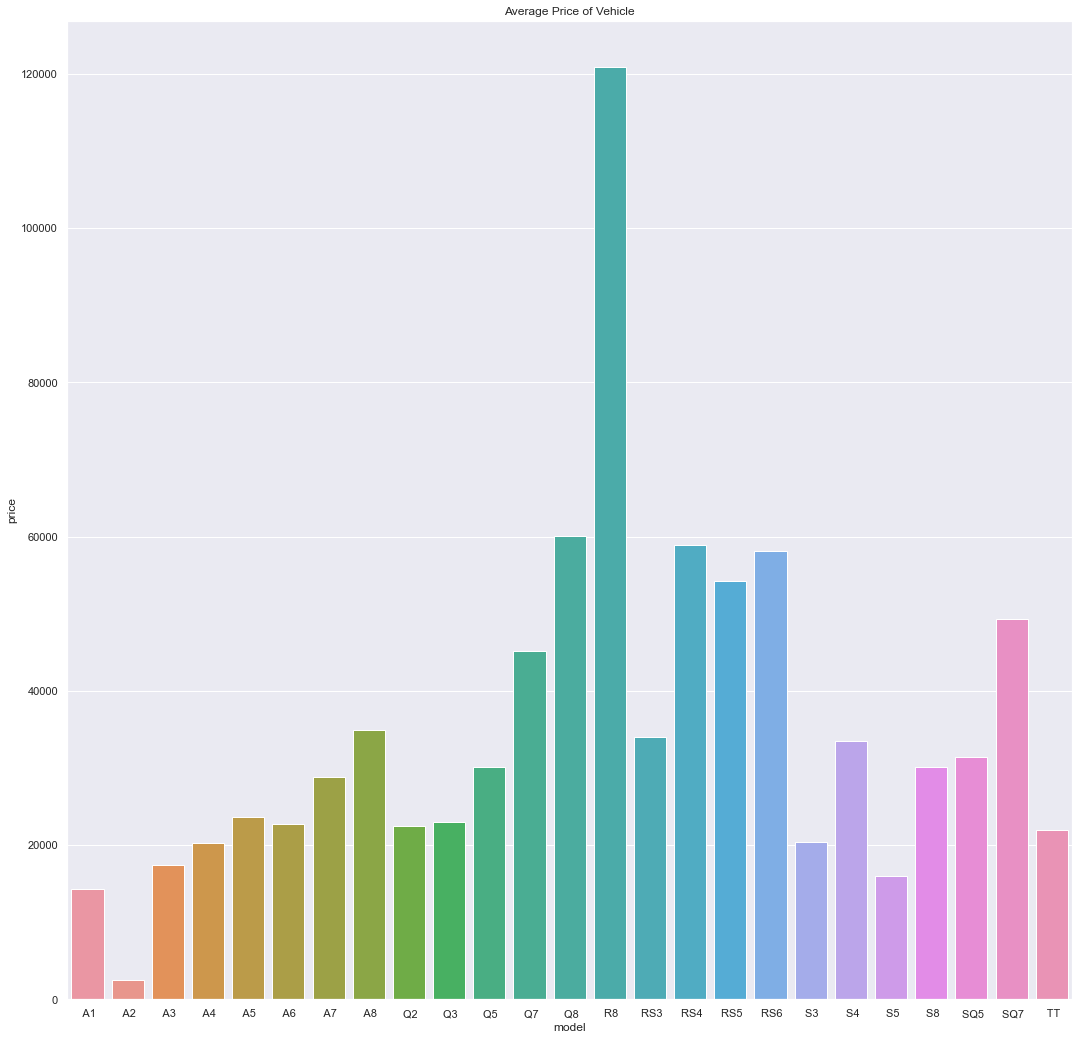

In [58]:
plt.subplots(figsize = (18,18))
priceByModel = a_clean.groupby("model")['price'].mean().reset_index()
plt.title("Average Price of Vehicle")
sns.set()
sns.barplot(x = 'model', y = 'price', data = priceByModel)
plt.show()

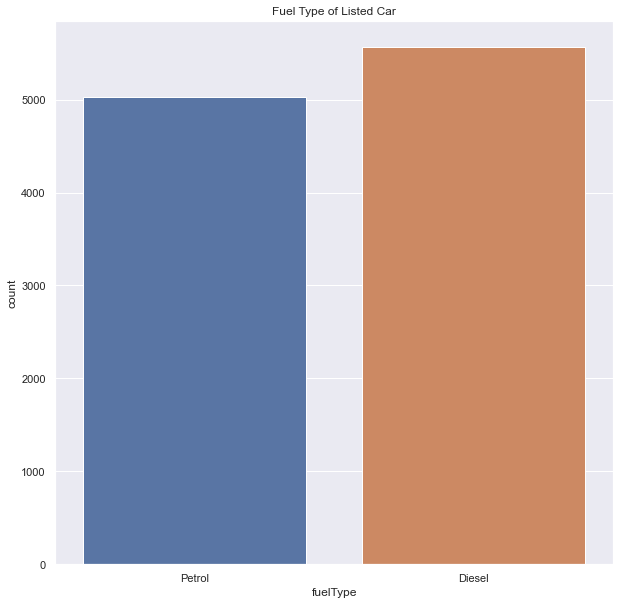

In [59]:
plt.figure(figsize = (10,10))
sns.countplot(x = "fuelType", data = a_clean)
plt.title("Fuel Type of Listed Car")
plt.show()

This shows that the listed cars are of diesel fuel type. Petrol fuel type are at the second place, amongst the listed cars.

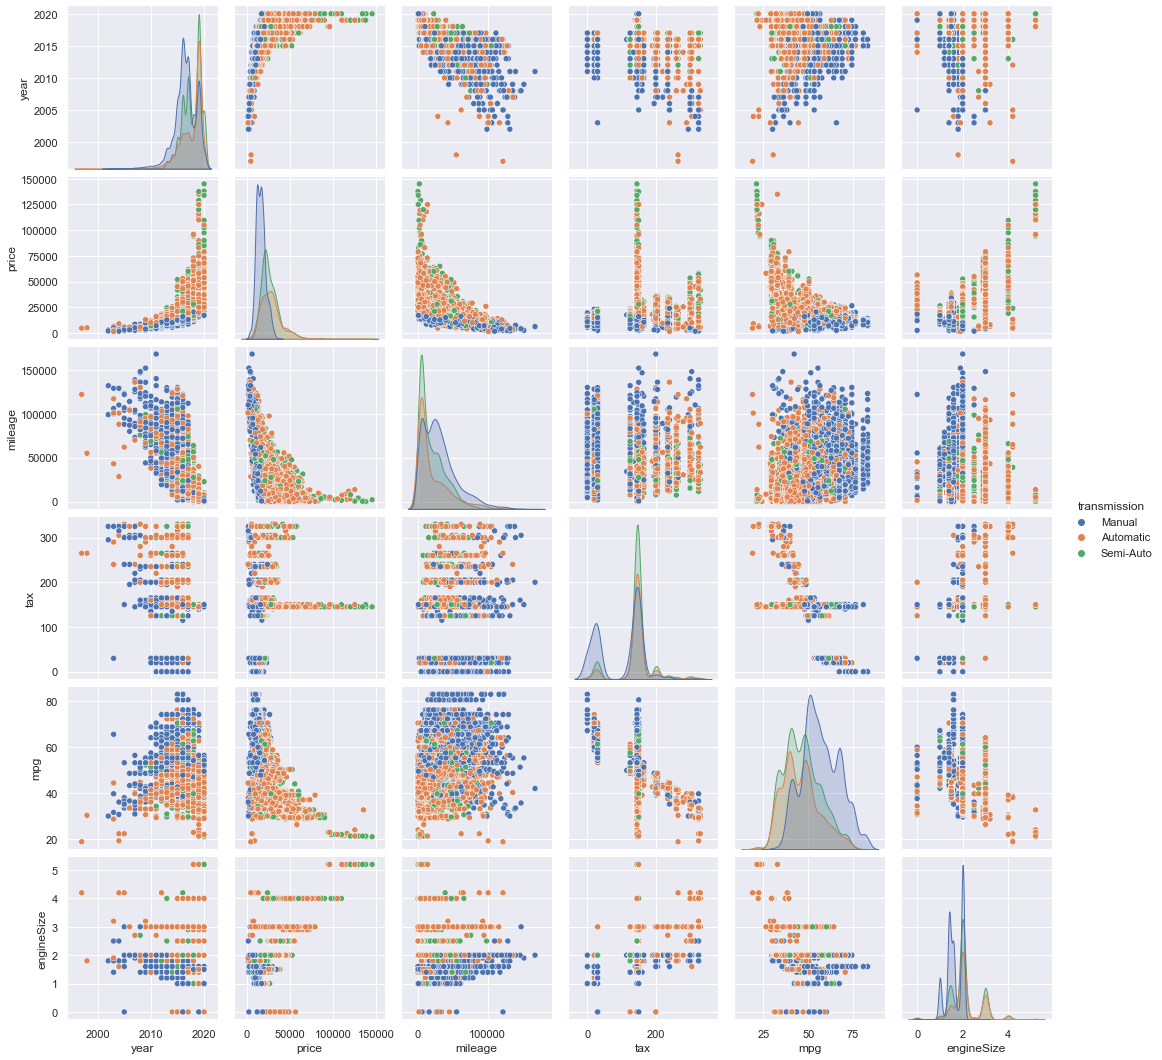

In [60]:
sns.pairplot(a_clean, diag_kind = "kde", hue = "transmission")
plt.show()

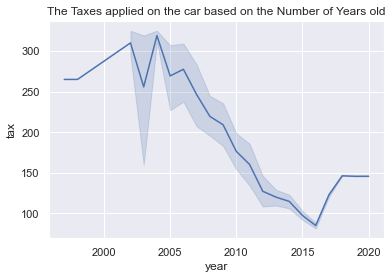

In [61]:
sns.lineplot(x = "year", y = "tax", data = a_clean)
plt.title("The Taxes applied on the car based on the Number of Years old")
plt.show()

By this lineplot we can see that atleast 150 Euros are the taxes applied on cars which are relatively new i.e. 1-2 years old. In UK, every car needs to pay road tax irrespective of being a used car or a new car. There can been some deviations in the taxes on the specific year-old car. Our assumption is that the taxes are varying because the type of the car too. Like SUVs, Sedans will have more taxes applied on it.

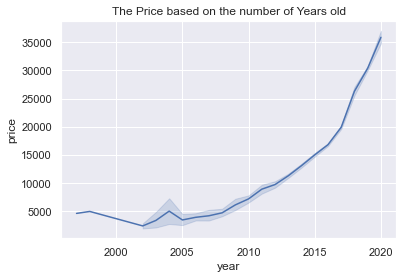

In [62]:
sns.lineplot(x = "year", y = "price", data = a_clean)
plt.title("The Price based on the number of Years old")
plt.show()

By this lineplot we can see that the cars which are relatively new are having higher prices which is obvious because lesser distance the cars have travelled. But we can see that there are some deviations or differeneces in prices of the car which are like 4-5 years old. People have tried to maximize their profit but haven't seen it through.

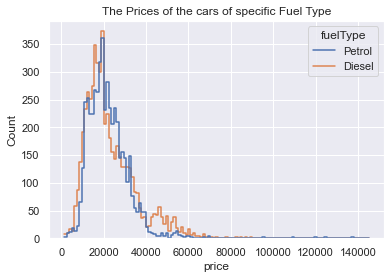

In [63]:
sns.histplot(data = a_clean, x = 'price', hue = 'fuelType', fill = False, element = 'step')
plt.title("The Prices of the cars of specific Fuel Type")
plt.show()

The above visualization shows that the prices of cars of Diesel and Petrol fuel types are having almost similar price range.

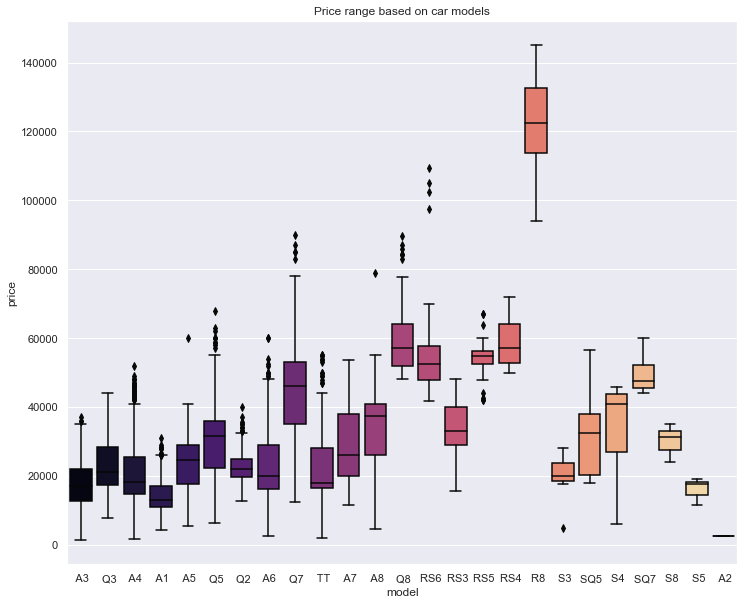

In [64]:
plt.figure(figsize = (12,10))
sns.boxplot(data = a_clean, x = 'model', y = 'price', order = a_clean['model'].value_counts().index, palette = 'magma')
plt.title("Price range based on car models")
plt.show()

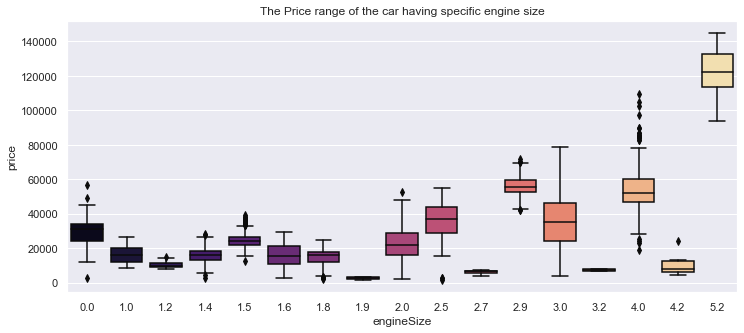

In [65]:
plt.figure(figsize = (12,5))
sns.boxplot(data = a_clean, x = 'engineSize', y = 'price', palette = 'magma')
plt.title("The Price range of the car having specific engine size")
plt.show()

C:\Users\siddhesh shankar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


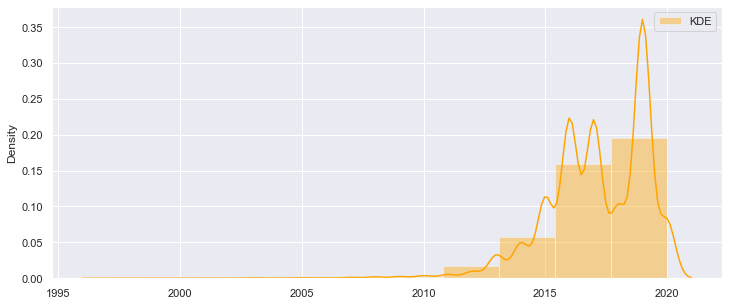

In [66]:
sns.distplot(x = a_clean['year'], bins = 10, color = 'Orange',label = 'KDE')
plt.legend()
plt.gcf().set_size_inches(12,5)
plt.show()

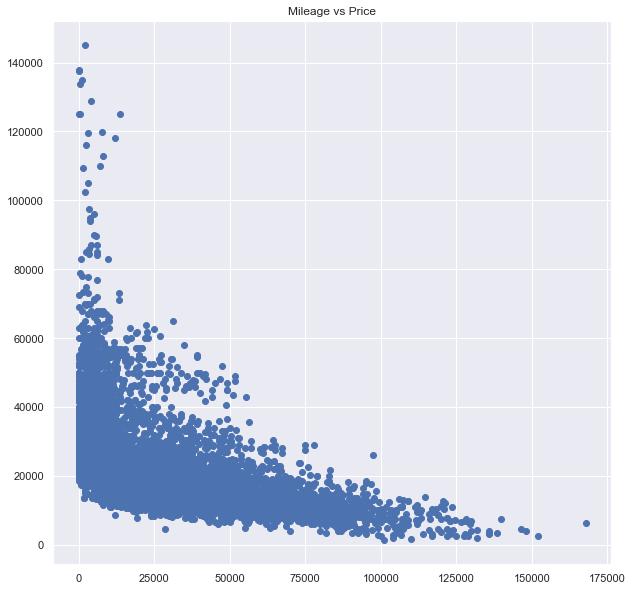

In [67]:
plt.figure(figsize = (10,10))
plt.scatter(x = a_clean['mileage'], y = a_clean['price'])
plt.title("Mileage vs Price")
plt.show()

### Feature Engineering:
#### Label Encoding: 

We are doing Label Encoding so that we can convert the categorical values or variables into numeric values so that it is easier for the machine to read it.

In [68]:
encoder = LabelEncoder()
a_clean['model'] = encoder.fit_transform(a_clean['model'])
model_mapping = {index : label for index, label in enumerate(encoder.classes_)}
model_mapping

{0: ' A1',
 1: ' A2',
 2: ' A3',
 3: ' A4',
 4: ' A5',
 5: ' A6',
 6: ' A7',
 7: ' A8',
 8: ' Q2',
 9: ' Q3',
 10: ' Q5',
 11: ' Q7',
 12: ' Q8',
 13: ' R8',
 14: ' RS3',
 15: ' RS4',
 16: ' RS5',
 17: ' RS6',
 18: ' S3',
 19: ' S4',
 20: ' S5',
 21: ' S8',
 22: ' SQ5',
 23: ' SQ7',
 24: ' TT'}

In [69]:
a_clean['transmission'] = encoder.fit_transform(a_clean['transmission'])
transmission_mapping = {index : label for index, label in enumerate(encoder.classes_)}
transmission_mapping

{0: 'Automatic', 1: 'Manual', 2: 'Semi-Auto'}

In [70]:
a_clean['fuelType'] = encoder.fit_transform(a_clean['fuelType'])
fuelType_mapping = {index : label for index, label in enumerate(encoder.classes_)}
fuelType_mapping

{0: 'Diesel', 1: 'Petrol'}

In [71]:
a_clean.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,2017,12500,1,15735,1,150,55.4,1.4
1,5,2016,16500,0,36203,0,20,64.2,2.0
2,0,2016,11000,1,29946,1,30,55.4,1.4
3,3,2017,16800,0,25952,0,145,67.3,2.0
4,2,2019,17300,1,1998,1,145,49.6,1.0


In [72]:
x = a_clean.drop('price', axis = 1)
y = a_clean['price']

In [73]:
scaler = MinMaxScaler(copy = True, feature_range = (0,1))
X = scaler.fit_transform(x)
X[:10]

array([[0.        , 0.86956522, 0.5       , 0.09364584, 1.        ,
        0.45454545, 0.56853583, 0.26923077],
       [0.20833333, 0.82608696, 0.        , 0.21546757, 0.        ,
        0.06060606, 0.70560748, 0.38461538],
       [0.        , 0.82608696, 0.5       , 0.17822707, 1.        ,
        0.09090909, 0.56853583, 0.26923077],
       [0.125     , 0.86956522, 0.        , 0.15445553, 0.        ,
        0.43939394, 0.75389408, 0.38461538],
       [0.08333333, 0.95652174, 0.5       , 0.01188577, 1.        ,
        0.43939394, 0.47819315, 0.19230769],
       [0.        , 0.82608696, 0.        , 0.19199957, 1.        ,
        0.09090909, 0.62305296, 0.26923077],
       [0.20833333, 0.82608696, 0.        , 0.45702195, 0.        ,
        0.09090909, 0.66199377, 0.38461538],
       [0.125     , 0.82608696, 0.5       , 0.44748119, 0.        ,
        0.06060606, 0.80529595, 0.38461538],
       [0.08333333, 0.7826087 , 0.5       , 0.2744441 , 1.        ,
        0.06060606, 0.641744

In [74]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 30, random_state=0)

In [75]:
print("Shape of the x_train: ", x_train.shape)

Shape of the x_train:  (10564, 8)


In [76]:
print("Shape of the x_test: ", x_test.shape)

Shape of the x_test:  (30, 8)


In [77]:
print("Shape of y_train:", y_train.shape)

Shape of y_train: (10564,)


In [78]:
print("Shape of the y_test: ", y_test.shape)

Shape of the y_test:  (30,)


### Model Creation: 
#### Linear Regression Model:

In [79]:
LinearRegressionModel = LinearRegression(fit_intercept = True, normalize = True, copy_X = True, n_jobs = -1)
LinearRegressionModel.fit(x_train, y_train)


print('Linear Regression Train Score is : ' , LinearRegressionModel.score(x_train, y_train))
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(x_test, y_test))

print('----------------------------------------------------')
y_pred = LinearRegressionModel.predict(x_test)
print('Predicted Value for Linear Regression is : ' , y_pred[:10])

Linear Regression Train Score is :  0.816716666652079
Linear Regression Test Score is :  0.8724082063149566
----------------------------------------------------
Predicted Value for Linear Regression is :  [45379.44775579 35680.42072375  6657.51745527 15021.68355878
 41159.0510055  43957.10289283 35495.91514863 13931.67444056
 12783.4183797  20078.74661031]


In [80]:
pricePredicted = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
pricePredicted = pricePredicted.reset_index()
pricePredicted.head(5)

,index,Actual Price,Predicted Price
0,4836,51990,45379.447756
1,5146,29990,35680.420724
2,8824,10500,6657.517455
3,10256,17600,15021.683559
4,3363,39500,41159.051005


#### Random Forest Regressor Model:

In [81]:
RandomForestRegressorModel = RandomForestRegressor(n_estimators=100,max_depth=11, random_state=33)
RandomForestRegressorModel.fit(x_train, y_train)

print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(x_train, y_train))
print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(x_test, y_test))
print('Random Forest Regressor No. of features are : ' , RandomForestRegressorModel.n_features_)
print('----------------------------------------------------')

y_pred = RandomForestRegressorModel.predict(x_test)
print('Predicted Value for Random Forest Regressor is : ' , y_pred[:10])


Random Forest Regressor Train Score is :  0.9764707087816182
Random Forest Regressor Test Score is :  0.9774497154822579
Random Forest Regressor No. of features are :  8
----------------------------------------------------
Predicted Value for Random Forest Regressor is :  [52740.40227529 33495.69157301 10586.33099873 20051.28569616
 39470.46639304 45879.82425123 36961.60782462 18000.83623952
 11693.13553068 18368.85174137]


In [91]:
pricePredicted = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
pricePredicted = pricePredicted.reset_index()
pricePredicted.head(5)

,index,Actual Price,Predicted Price
0,4836,51990,52042.473949
1,5146,29990,33259.869737
2,8824,10500,10602.710217
3,10256,17600,18842.882217
4,3363,39500,39550.970468


In [83]:
meanSquaredErrorVal = mean_squared_error(y_test, y_pred, multioutput = 'uniform_average')
print('Mean Squared Value Error: ', meanSquaredErrorVal)

Mean Squared Value Error:  4252282.837017126


In [84]:
r2 = r2_score(y_pred, y_test)
print(f'Random Forest Regressor r2-score: {r2:0.5f}')

Random Forest Regressor r2-score: 0.97828


#### Catboost Regressor Model by Yandex:

In [85]:
catModel = CatBoostRegressor(verbose = 0, random_state = 33)
catModel.fit(x_train, y_train)
y_pred = catModel.predict(x_test)
r2 = r2_score(y_pred, y_test)
print(f'CatBoost Regressor Model by Yandex r2 score : {r2:0.5f}')

CatBoost Regressor Model by Yandex r2 score : 0.98505


In [86]:
pricePredicted = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
pricePredicted = pricePredicted.reset_index()
pricePredicted.head(5)

,index,Actual Price,Predicted Price
0,4836,51990,52042.473949
1,5146,29990,33259.869737
2,8824,10500,10602.710217
3,10256,17600,18842.882217
4,3363,39500,39550.970468
